## Step 1: Define Regression Analysis Calculator

In [1]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

class Regression_Calculator:
    def __init__(self, data):
        #Initialize the class
        self.data = data
        self.linear_regressor = LinearRegression()
        self.linear_regressor = None #place holder
        self.y = None #place holder
        self.x = None #place holder
        self.x_train = None #place holder
        self.y_train = None #place holder
        self.x_test = None #place holder
        self.y_test = None #place holder
        print('Regression Defined. Proceed To Scale The Data')
        
    def scale_data(self):
        # Identify numeric columns that are not binary (0s and 1s)
        numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        non_binary_columns = [col for col in numeric_columns if len(self.data[col].unique()) > 2]

        # Scale only non-binary numeric columns
        scaler = StandardScaler()
        scaled_data = self.data.copy()
        scaled_data[non_binary_columns] = scaler.fit_transform(scaled_data[non_binary_columns])

        self.data = scaled_data
        print('Data Scaled. Proceed To Use A Correlational Table')
        
    def correl_table(self):
        corr = self.data.corr()
        plt.figure(figsize=(14,6))
        sns.heatmap(corr,annot = True, cmap = sns.diverging_palette(20,220,n=200))
    
    def define_y_value(self,y_val):
        #Saves target variable
        
        self.y = pd.DataFrame(self.data[y_val])
        
        # Removing the column using list comprehension
        explanatory_columns = [col for col in self.data.columns if col != y_val]

        #Get dummies turns yes and nos to 0 and 1, the method only changes cateogrical vraibles and leaves the other ones unchanged
        self.x = pd.get_dummies(self.data[explanatory_columns],drop_first = True)
        
        #we divided the data into predictors (IVS) X, and measures (DVS) Y
    def train_regression_model(self):
        #Split the data into a training and a test set, where 80% is training and 20% is test
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(self.x,self.y,test_size = 0.2, random_state =0)
        self.x_train.shape
        
        
        # Train a linear regression on the training set and estimate the coefficents
        #call an instance of linear regression
        self.linear_regressor = LinearRegression()
        #train the regression
        self.linear_regressor.fit(self.x_train,self.y_train)
        coeff_df = pd.DataFrame(self.linear_regressor.coef_, columns = self.x.columns)
        print("Regression Performed, Model Trained The Linear Coefficents are:")
        coeff_df
        
        print("Statistical Information On The Analysis")
        x_train2 = sm.add_constant(self.x_train)
        est = sm.OLS(self.y_train,x_train2)
        est2 = est.fit()
        print(est2.summary())
        
        print("Training Complete Proceed To Evaluate The Model")
    def evaluate_model_accuracy(self):
        #uses the linear regression model that we trained to train and test
        y_train_pred = self.linear_regressor.predict(self.x_train)
        y_test_pred = self.linear_regressor.predict(self.x_test)
        
        plt.figure(figsize = (15,8))
        plt.scatter(y_train_pred, y_train_pred-self.y_train, c='steelblue', marker = 'o', label = "Training data")
        plt.scatter(y_test_pred, y_test_pred-self.y_test, color = 'limegreen', marker = 's',label='Test data')
        plt.xlabel("Predicted Values")
        plt.ylabel("Residuals")
        plt.legend(loc = 'upper right')
        plt.hlines(y = 0,xmin = self.x_train.values.min(), xmax = self.x_train.values.max(), color = 'black', lw =2)
        plt.show()
        
        #if the model has similar evaulation metrics than the models perform well (for example if the tr)

        print('Mean Absolute Error on Test Data:', metrics.mean_absolute_error(self.y_test, y_test_pred))
        print('Mean Absolute Error on Training Data:', metrics.mean_absolute_error(self.y_train, y_train_pred))
        print('Mean Squared Error on Test Data:', metrics.mean_squared_error(self.y_test, y_test_pred))
        print('Mean Squared Error on Training Data:', metrics.mean_squared_error(self.y_train, y_train_pred))
        print('Root Mean Squared Error on Test Data:', np.sqrt(metrics.mean_squared_error(self.y_test, y_test_pred)))
        print('Root Mean Squared Error on Training Data:', np.sqrt(metrics.mean_squared_error(self.y_train, y_train_pred)))
        
        r_sq_test = r2_score(self.y_test, y_test_pred)
        r_sq_train = r2_score(self.y_train, y_train_pred)
        print('R squared on test set:', r_sq_test)
        print('R squared on training set:', r_sq_train)
    

## Step 2: Prepare Data
- Read Data
- Preprocess Data 
- Change Any Columns with 0/1s to Object Data Types

In [2]:
import pandas as pd
import os

data = pd.read_csv(os.path.join(os.getcwd(),'data_clean.csv'))

In [3]:
data.head()
data.dtypes

manufacturer            object
model                   object
year                     int64
mileage                float64
engine                  object
transmission            object
drivetrain              object
fuel_type               object
mpg                     object
max_mpg                float64
exterior_color          object
interior_color          object
accidents_or_damage    float64
one_owner              float64
personal_use_only      float64
seller_name             object
seller_rating          float64
price_drop             float64
price                  float64
dtype: object

In [4]:
#Convert year to float
data['year'] = data['year'].astype(float)

#you need numerical varaibles to conduct cluster analyis (float)
data.dtypes
#Create a new df with only float columns
numeric_df = data.select_dtypes(include=['float64'])

In [5]:
numeric_df

,year,mileage,max_mpg,accidents_or_damage,one_owner,personal_use_only,seller_rating,price_drop,price
0,2013.0,92945.0,38.0,0.0,0.0,0.0,0.0,300.0,13988.0
1,2013.0,47645.0,38.0,1.0,1.0,1.0,0.0,0.0,17995.0
2,2013.0,53422.0,38.0,0.0,1.0,1.0,4.3,500.0,17000.0
3,2013.0,62042.0,38.0,0.0,0.0,1.0,2.2,109.0,18000.0
4,2013.0,57212.0,38.0,0.0,1.0,1.0,0.0,0.0,15999.0
...,...,...,...,...,...,...,...,...,...
566811,2020.0,26781.0,34.0,1.0,1.0,1.0,5.0,1108.0,30883.0
566812,2022.0,22877.0,33.0,0.0,1.0,0.0,4.2,250.0,34798.0
566813,2014.0,92000.0,30.0,0.0,0.0,1.0,0.0,300.0,12299.0
566814,2013.0,132000.0,29.0,1.0,0.0,0.0,4.6,1000.0,8995.0


In [6]:
#change 0 and 1 Columns to objects so that pandas will treat them correctly
numeric_df['accidents_or_damage'] = numeric_df['accidents_or_damage'].astype(object)
numeric_df['one_owner'] = numeric_df['one_owner'].astype(object)
numeric_df['personal_use_only'] = numeric_df['personal_use_only'].astype(object)

## Step 3: Perform Regressions

Regression Defined. Proceed To Scale The Data
Data Scaled. Proceed To Use A Correlational Table


C:\Users\12034\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Regression Performed, Model Trained The Linear Coefficents are:
Statistical Information On The Analysis
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                 3.169e+04
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:32:30   Log-Likelihood:            -5.4030e+05
No. Observations:              453452   AIC:                         1.081e+06
Df Residuals:                  453443   BIC:                         1.081e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------

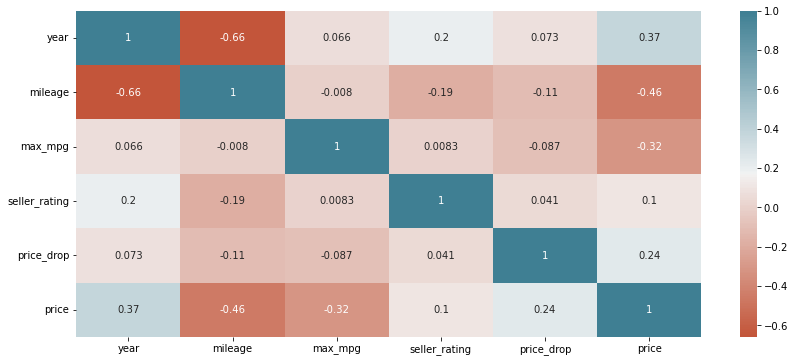

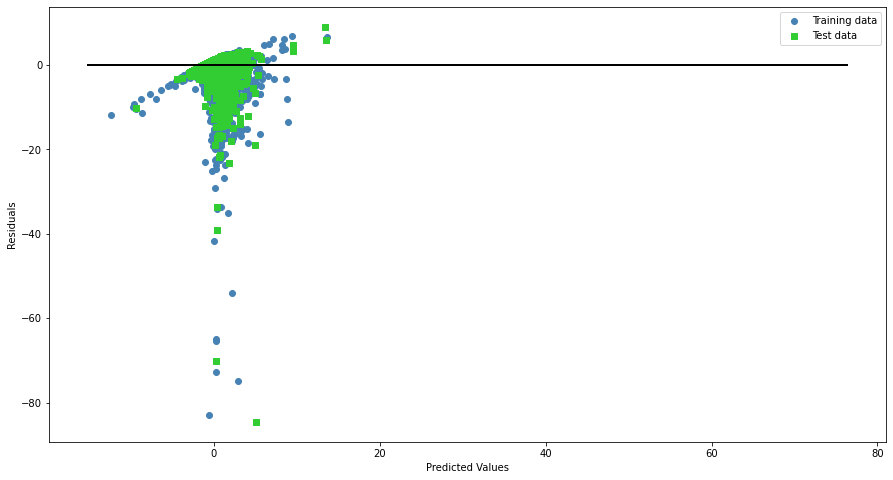

Mean Absolute Error on Test Data: 0.4061029567436104
Mean Absolute Error on Training Data: 0.40437133217282606
Mean Squared Error on Test Data: 0.6824499838279665
Mean Squared Error on Training Data: 0.6345672084890833
Root Mean Squared Error on Test Data: 0.8261053103739053
Root Mean Squared Error on Training Data: 0.7965972686929597
R squared on test set: 0.34530501660147106
R squared on training set: 0.35863460636145417


In [7]:
# Example usage
# Assuming `data` is your DataFrame containing the car sale data
regression_calculator = Regression_Calculator(numeric_df)

# Perform data scaling
regression_calculator.scale_data()

# Display correlation heatmap
regression_calculator.correl_table()

# Define target variable and explanatory variables
regression_calculator.define_y_value('price')

# Train the linear regression model
regression_calculator.train_regression_model()

# Evaluate model accuracy
regression_calculator.evaluate_model_accuracy()

Regression Defined. Proceed To Scale The Data
Data Scaled. Proceed To Use A Correlational Table
Regression Performed, Model Trained The Linear Coefficents are:
Statistical Information On The Analysis
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                 6.324e+04
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:32:32   Log-Likelihood:            -5.8522e+05
No. Observations:              453452   AIC:                         1.170e+06
Df Residuals:                  453449   BIC:                         1.170e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
          

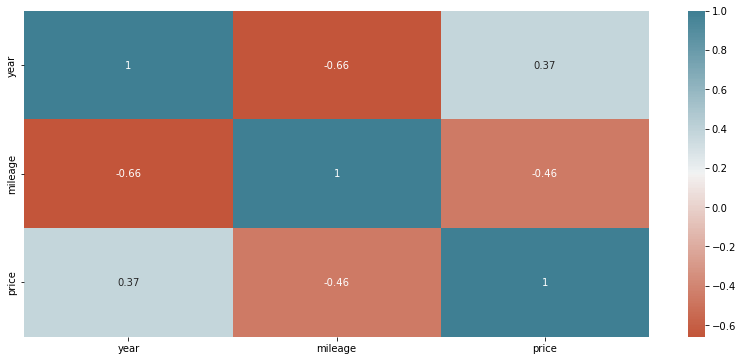

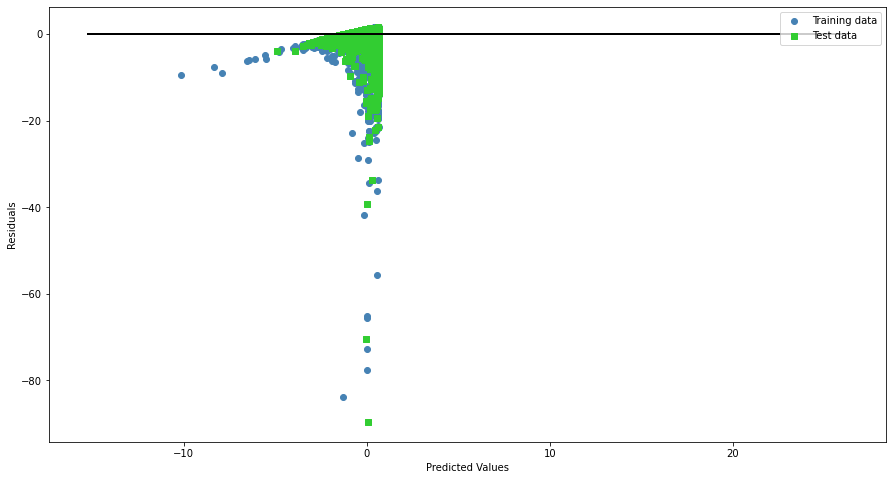

Mean Absolute Error on Test Data: 0.48249226117512267
Mean Absolute Error on Training Data: 0.48162248859932766
Mean Squared Error on Test Data: 0.823932490842165
Mean Squared Error on Training Data: 0.7736130989737868
Root Mean Squared Error on Test Data: 0.9077072715595954
Root Mean Squared Error on Training Data: 0.8795527835063606
R squared on test set: 0.20957655330621383
R squared on training set: 0.2180991026488034


In [8]:
# Example usage
# Assuming `data` is your DataFrame containing the car sale data
regression_calculator2 = Regression_Calculator(numeric_df[['year','mileage', 'price']])

# Perform data scaling
regression_calculator2.scale_data()

# Display correlation heatmap
regression_calculator2.correl_table()

# Define target variable and explanatory variables
regression_calculator2.define_y_value('price')

# Train the linear regression model
regression_calculator2.train_regression_model()

# Evaluate model accuracy
regression_calculator2.evaluate_model_accuracy()

Regression Defined. Proceed To Scale The Data
Data Scaled. Proceed To Use A Correlational Table
Regression Performed, Model Trained The Linear Coefficents are:
Statistical Information On The Analysis
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                 1.203e+05
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:32:33   Log-Likelihood:            -5.8765e+05
No. Observations:              453452   AIC:                         1.175e+06
Df Residuals:                  453450   BIC:                         1.175e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
          

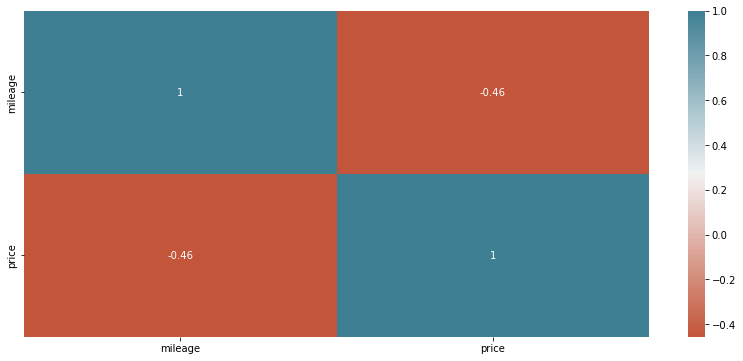

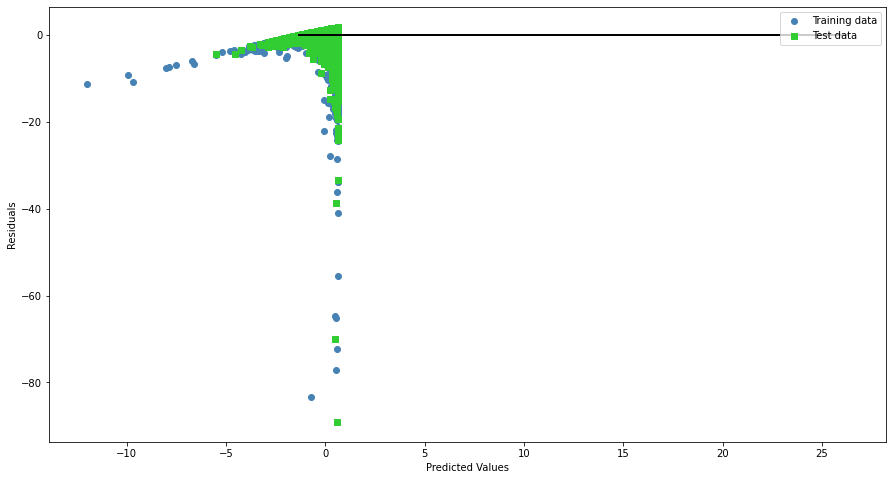

Mean Absolute Error on Test Data: 0.49410783375164996
Mean Absolute Error on Training Data: 0.49308508254452443
Mean Squared Error on Test Data: 0.8320510065452543
Mean Squared Error on Training Data: 0.7819273975048695
Root Mean Squared Error on Test Data: 0.9121682994630181
Root Mean Squared Error on Training Data: 0.8842665873507093
R squared on test set: 0.2017882147767861
R squared on training set: 0.20969573216435466


In [9]:
# Example usage
# Assuming `data` is your DataFrame containing the car sale data
regression_calculator3 = Regression_Calculator(numeric_df[['mileage', 'price']])

# Perform data scaling
regression_calculator3.scale_data()

# Display correlation heatmap
regression_calculator3.correl_table()

# Define target variable and explanatory variables
regression_calculator3.define_y_value('price')

# Train the linear regression model
regression_calculator3.train_regression_model()

# Evaluate model accuracy
regression_calculator3.evaluate_model_accuracy()

Regression Defined. Proceed To Scale The Data
Data Scaled. Proceed To Use A Correlational Table
Regression Performed, Model Trained The Linear Coefficents are:
Statistical Information On The Analysis
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     2965.
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:32:41   Log-Likelihood:                -441.83
No. Observations:                1218   AIC:                             891.7
Df Residuals:                    1214   BIC:                             912.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
          

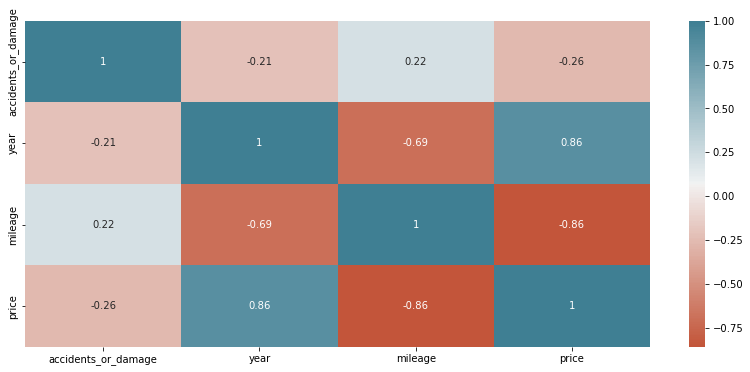

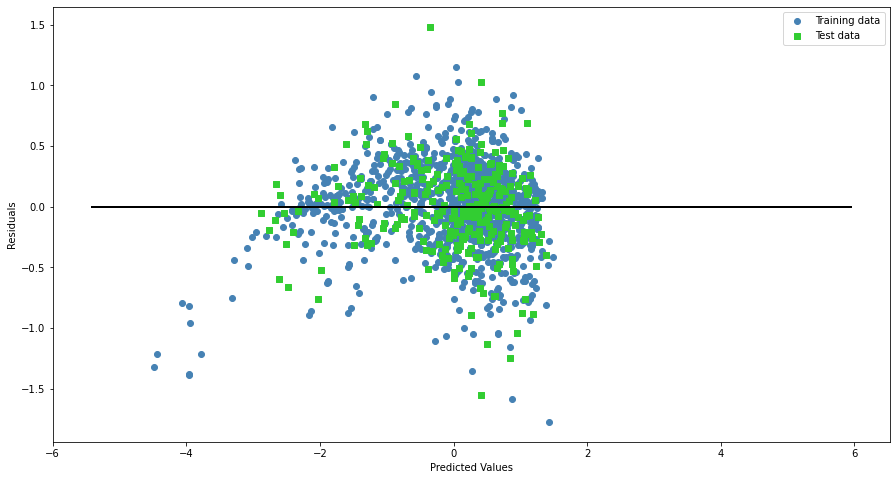

Mean Absolute Error on Test Data: 0.2685641183452843
Mean Absolute Error on Training Data: 0.26183022440390147
Mean Squared Error on Test Data: 0.1279571561757157
Mean Squared Error on Training Data: 0.12095018537628222
Root Mean Squared Error on Test Data: 0.3577109953240405
Root Mean Squared Error on Training Data: 0.3477789317602235
R squared on test set: 0.8679212693324238
R squared on training set: 0.8799128061324074


In [11]:
toyota_df = data[data['manufacturer'] == 'Toyota']
toyota_df = toyota_df[toyota_df['model'] == 'Camry SE']
toyota_df.select_dtypes(include=['float64'])

# Assuming `data` is your DataFrame containing the car sale data
regression_calculator4 = Regression_Calculator(toyota_df[['accidents_or_damage','year','mileage', 'price']])

# Perform data scaling
regression_calculator4.scale_data()

# Display correlation heatmap
regression_calculator4.correl_table()

# Define target variable and explanatory variables
regression_calculator4.define_y_value('price')

# Train the linear regression model
regression_calculator4.train_regression_model()

# Evaluate model accuracy
regression_calculator4.evaluate_model_accuracy()

Regression Defined. Proceed To Scale The Data
Data Scaled. Proceed To Use A Correlational Table
Regression Performed, Model Trained The Linear Coefficents are:
Statistical Information On The Analysis
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     9784.
Date:                Mon, 17 Jun 2024   Prob (F-statistic):               0.00
Time:                        21:42:34   Log-Likelihood:            -5.2488e+05
No. Observations:              453452   AIC:                         1.050e+06
Df Residuals:                  453420   BIC:                         1.050e+06
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
          

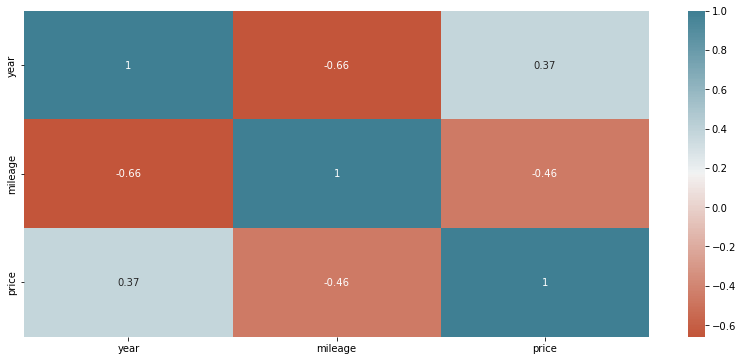

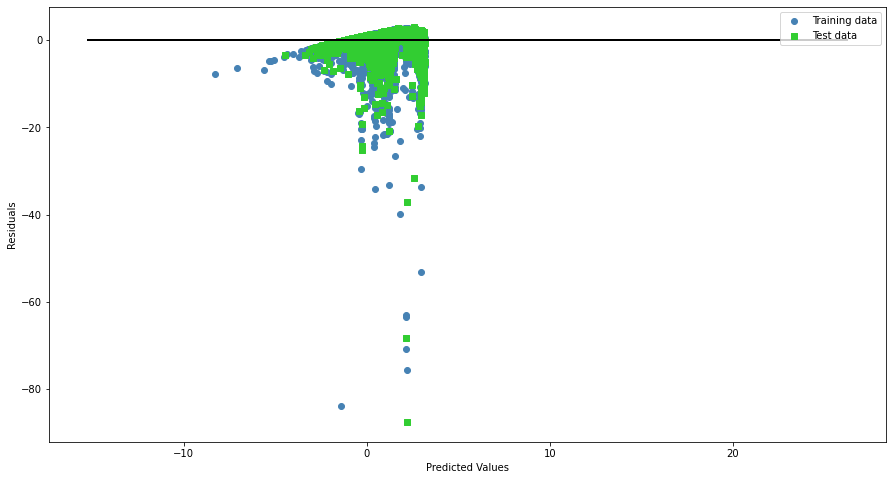

Mean Absolute Error on Test Data: 0.41171760416922737
Mean Absolute Error on Training Data: 0.41029839503450477
Mean Squared Error on Test Data: 0.634835359968296
Mean Squared Error on Training Data: 0.5928264442739775
Root Mean Squared Error on Test Data: 0.7967655614848674
Root Mean Squared Error on Training Data: 0.7699522350600572
R squared on test set: 0.39098317048240416
R squared on training set: 0.40082254376738724


In [23]:
data_make = data[['manufacturer','year','mileage','price']]

# Assuming `data` is your DataFrame containing the car sale data
regression_calculator5 = Regression_Calculator(data_make)

# Perform data scaling
regression_calculator5.scale_data()

# Display correlation heatmap
regression_calculator5.correl_table()

# Define target variable and explanatory variables
regression_calculator5.define_y_value('price')

# Train the linear regression model
regression_calculator5.train_regression_model()

# Evaluate model accuracy
regression_calculator5.evaluate_model_accuracy()